In [1]:
import numpy as np
import matplotlib.pyplot as plt

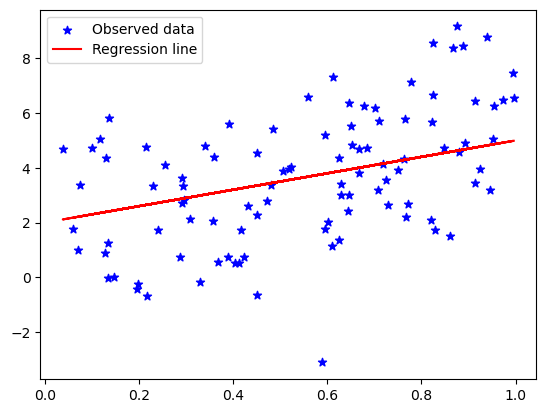

In [2]:
X_i= np.random.uniform(0,1,100)
epsilon_i= np.random.normal(0,1,100)
Y_i = 2+ 3*X_i + 2*epsilon_i
Y_t= 2+ 3*X_i
shreya= plt.scatter(X_i, Y_i, color= 'blue', label='Observed data',marker='*')
shreya1= plt.plot(X_i, Y_t, color='red', label='Regression line')
plt.legend()
plt.show()

In [3]:
# calculation of cov and variance
cov= np.cov(X_i,Y_i)
var= np.var(X_i)
beta_hat_2= cov[0,1]/var
beta_hat_1= np.mean(Y_i) - beta_hat_2*(np.mean(X_i))
[beta_hat_1, beta_hat_2]

[1.191423775802806, 4.485339230158626]

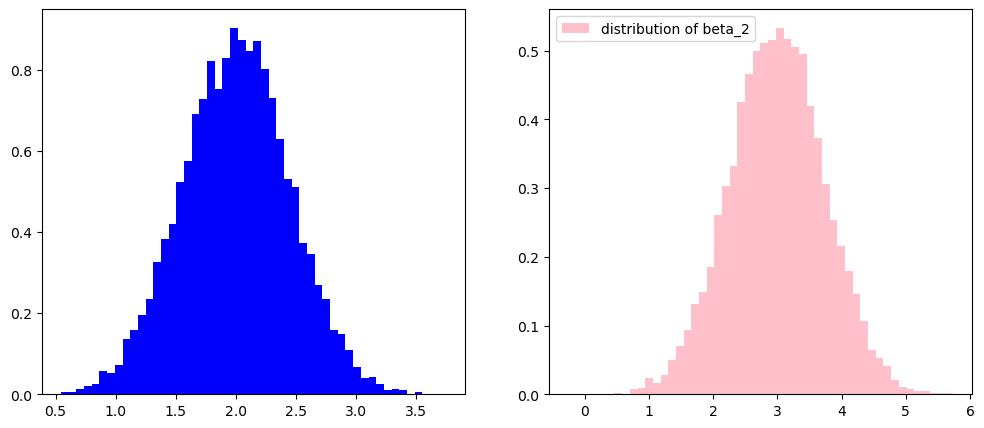

In [4]:
beta_estimates = []
X_matrix = np.column_stack((np.ones(100), X_i))  

for i in range(10000):
    Epsilon = np.random.normal(0,1,100)    
    Y = 2 + 3*X_i +2 * Epsilon  # Compute Y
   
    beta_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ X_matrix.T @ Y
    beta_estimates.append(beta_hat)  # Store estimates
beta_estimates= np.array(beta_estimates)
fig, axes = plt.subplots(1,2,figsize=(12,5))
axes[0].hist(beta_estimates[:,0], density= True, color='blue', label='distribution of beta_1',bins=50)
axes[1].hist(beta_estimates[:,1], density= True, color='pink', label='distribution of beta_2',bins=50)
plt.legend()
plt.show()


In [20]:
e= Y- (X_matrix@beta_hat)
sigma2_hat= (e.T@e)/(100-2)
sigma2_hat

3.7538518086046073

In [6]:
v_hat = sigma2_hat* np.linalg.inv((X_matrix.T@ X_matrix)/100)
v_hat

array([[ 18.94405854, -27.86515539],
       [-27.86515539,  50.88595043]])

In [7]:
se1= np.sqrt(v_hat[0,0]/100)
se2= np.sqrt(v_hat[1,1]/100)
[se1, se2]

[0.4352477288075231, 0.713343889261131]

In [8]:
t1= (beta_hat[0]-2)/se1
t2= (beta_hat[1]-3)/se2
[t1, t2]

[0.4667465923274964, -0.4977667033296381]

In [9]:
true_beta = np.array([2,3])

In [10]:
# w
v1= np.diag(v_hat)
v= np.diag(v1)
v

array([[18.94405854,  0.        ],
       [ 0.        , 50.88595043]])

In [11]:
W = (100*((beta_hat- true_beta).T @ np.linalg.inv(v)@ (beta_hat-true_beta)))/2
W

0.232812036196493

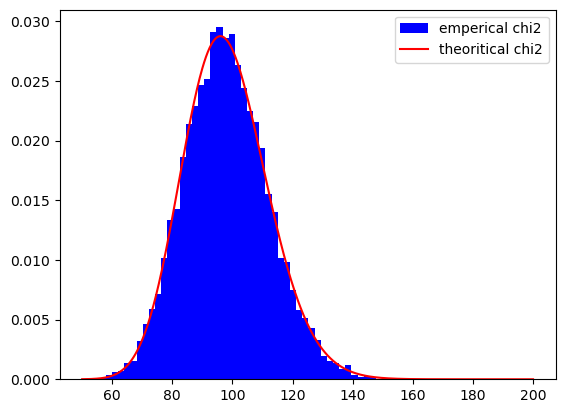

In [22]:
import scipy.stats as stats
X_i= np.random.uniform(0,1,100)
X_matrix = np.column_stack((np.ones(100), X_i))  
chi_val =[]
t_val=[]
F_val=[]

for i in range(10000):
    epsilon= np.random.normal(0,1,100)
    Y = 2 + 3*X_i + 2*epsilon 
    beta_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ (X_matrix.T @ Y)
    e = Y - (X_matrix@beta_hat)
    chi = (e.T@ e)/4
    chi_val.append(chi)
chi_val= np.array(chi_val)
x1= np.linspace(50,200,500)
plt.hist(chi_val, density= True, color='blue', bins=50, label='emperical chi2')
plt.plot(x1, stats.chi2.pdf(x1, 98), color='red', label='theoritical chi2')
plt.legend()
plt.show()

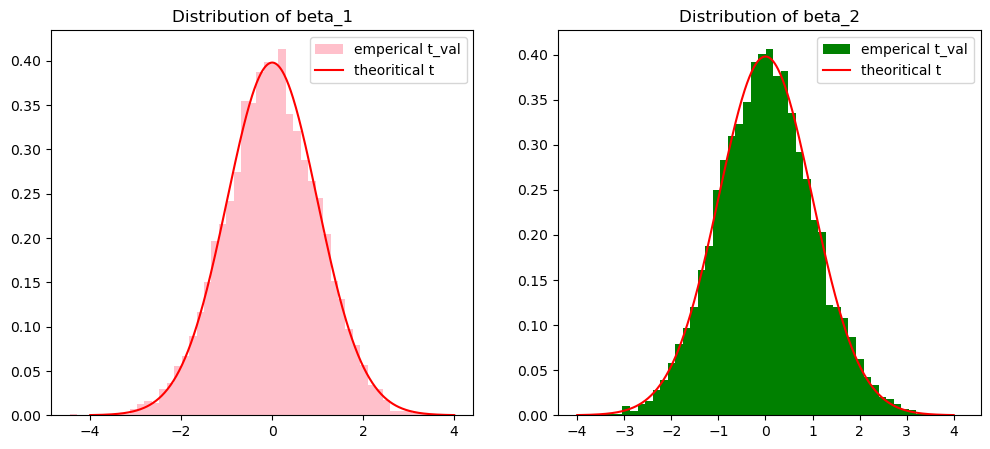

In [72]:
t_val=[]
for i in range(10000):
    epsilon= np.random.normal(0,1,100)
    Y = 2 + 3*X_i + 2*epsilon 
    beta_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ (X_matrix.T @ Y)
    e= Y- (X_matrix@beta_hat)
    sigma2_hat= (e.T@e)/(100-2)
    v_hat = sigma2_hat* np.linalg.inv((X_matrix.T@ X_matrix)/100)
    se= np.sqrt(np.diag(v_hat)/100)
    t = (beta_hat - true_beta)/se
    t_val.append(t)
fig, axes= plt.subplots(1,2,figsize=(12,5))
t_val = np.array(t_val)

x1= np.linspace(-4,4,500)
axes[0].hist(t_val[:,0], density= True, color='pink', bins=50, label='emperical t_val')
axes[0].plot(x1, stats.t.pdf(x1, 98), color='red', label='theoritical t')
axes[0].set_title('Distribution of beta_1')
axes[0].legend()

axes[1].hist(t_val[:,1], density= True, color='green', bins=50, label='emperical t_val')
axes[1].plot(x1, stats.t.pdf(x1, 98), color='red', label='theoritical t')
axes[1].set_title('Distribution of beta_2')
axes[1].legend()
plt.show()

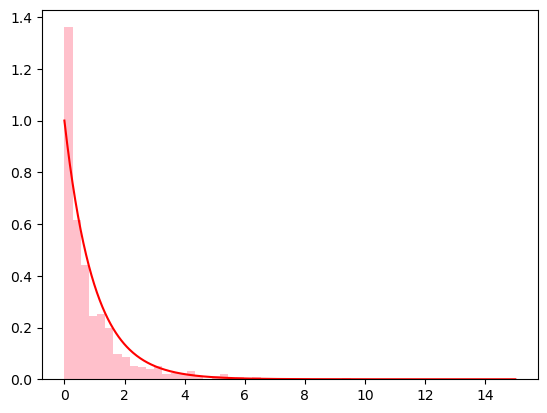

In [28]:
F_val=[]
for i in range(1000):
    epsilon= np.random.normal(0,1,100)
    Y = 2 + 3*X_i + 2*epsilon 
    beta_hat = np.linalg.inv(X_matrix.T @ X_matrix) @ (X_matrix.T @ Y)
    W = 50*((beta_hat - true_beta).T)@ np.linalg.inv(v)@(beta_hat- true_beta)
    F_val.append(W)
F_val= np.array(F_val)
x= np.linspace(0,15,500)
plt.hist(F_val, density= True, color='pink',bins=35)
plt.plot(x, stats.f.pdf(x,2,98), color='red')
plt.show()

In [80]:
# t statistic
t1 = beta_hat[0]/se1
t2 = beta_hat[1]/se2
[t1, t2]

[4.870950065068953, 3.689783367397614]

In [82]:
# confidence interval
ci1 = [beta_hat[0] - stats.t.ppf(0.025,98)*se1, beta_hat[0] + stats.t.ppf(0.025,98)*se1]
ci2 = [beta_hat[1] - stats.t.ppf(0.025,98)*se2, beta_hat[1] + stats.t.ppf(0.025,98)*se2]
[ci1,ci2]

[[2.7240361681337646, 1.146959030244034],
 [4.092518115343207, 1.2299484963501723]]

In [83]:
# wald statistic
W = 100*(beta_hat.T)@ np.linalg.inv(v)@(beta_hat)
W

35.71695570545994